In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re

In [5]:
df = pd.read_csv('olimpic_medals.csv', encoding='utf-8')

## Observe data

In [6]:
df.shape
df.info()

(29216, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.head()
df.tail()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"BAROEV, Khasan",RUS,Men,96 - 120kg,M,Silver


In [8]:
df['Edition'].value_counts()

2008    2042
2000    2015
2004    1998
1996    1859
1992    1705
1988    1546
1984    1459
1980    1387
1976    1305
1920    1298
1972    1185
1968    1031
1964    1010
1952     889
1912     885
1956     885
1924     884
1960     882
1936     875
1948     814
1908     804
1928     710
1932     615
1900     512
1904     470
1896     151
Name: Edition, dtype: int64

In [9]:
df['Sport'].value_counts().sort_index()

Aquatics             3828
Archery               305
Athletics            3448
Badminton             120
Baseball              335
Basketball            940
Basque Pelota           4
Boxing                842
Canoe / Kayak        1002
Cricket                24
Croquet                 8
Cycling              1025
Equestrian            894
Fencing              1547
Football             1387
Golf                   30
Gymnastics           2214
Handball              886
Hockey               1325
Ice Hockey             27
Jeu de paume            3
Judo                  435
Lacrosse               59
Modern Pentathlon     174
Polo                   66
Rackets                10
Roque                   3
Rowing               2523
Rugby                 192
Sailing              1061
Shooting             1105
Skating                27
Softball              180
Table Tennis          120
Taekwondo              80
Tennis                272
Triathlon              18
Tug of War             94
Volleyball  

### 1. Number of medals won by Jesse Owens in 1936

In [10]:
# make sure medals column has no nans and all values represent medals only
df['Medal'].value_counts()
df['Medal'].isna().any()

Gold      9850
Bronze    9689
Silver    9677
Name: Medal, dtype: int64

False

In [11]:
# This represents table which answer can be easily taken from
df.loc[(df['Edition'] == 1936) & (df['Athlete'].str.contains('owens', case=False))]

# This is a formal answer
df.loc[(df['Edition'] == 1936) & (df['Athlete'].str.contains('owens', case=False))].shape[0]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


4

### 2. Country won most of gold medals in Men's Badminton

In [12]:
# checking the data - # of gold medals is 19, not 20
df1 = df.loc[(df['Sport'] == 'Badminton') & (df['Gender'] == 'Men')]
df1['Medal'].value_counts()

Bronze    22
Silver    19
Gold      19
Name: Medal, dtype: int64

In [13]:
# This represents table which answer can be easily taken from
df1.loc[(df1['Medal'] == 'Gold'), 'NOC'].value_counts()

# This is a formal answer
# If you are curious, INA means Indonesia (I didn't even know)
df1.loc[(df1['Medal'] == 'Gold'), 'NOC'].value_counts().index[0]

INA    8
KOR    6
CHN    4
DEN    1
Name: NOC, dtype: int64

'INA'

### 3. Top 3 countries with most gold medals in 1984-2008

In [14]:
# We know that 2008 is the last year in the file so no need upperbound
df.loc[df['Edition'] >= 1984, 'NOC'].value_counts().head(3)

# Formal answer
df.loc[df['Edition'] >= 1984, 'NOC'].value_counts().head(3).index.tolist()

USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

['USA', 'AUS', 'GER']

### 4. Show gold medalists among men in "100m" with descending order by year. Show City where Olympics took place, athlete name and country he presented.

In [15]:
columns = ['City', 'Edition', 'Athlete', 'NOC'] # , 'Sport', 'Event']

# This is a large filter so take it on your own line for a better readability
row_filter = (df['Medal'] == 'Gold') & (df['Gender'] == 'Men') & (df['Event'].str.contains('100m', case=False))

#I'd be curious about Sport/Event so I left it commented out on the first line
df.loc[row_filter, columns].sort_values(by='Edition', ascending=False)

,City,Edition,Athlete,NOC
27606,Beijing,2008,"POWELL, Asafa",JAM
27321,Beijing,2008,"CROCKER, Ian",USA
27212,Beijing,2008,"PEIRSOL, Aaron",USA
27218,Beijing,2008,"KITAJIMA, Kosuke",JPN
27224,Beijing,2008,"PHELPS, Michael",USA
...,...,...,...,...
671,St Louis,1904,"BRACK, Walter",GER
231,Paris,1900,"JARVIS, Francis",USA
13,Athens,1896,"BURKE, Thomas",USA
3,Athens,1896,"MALOKINIS, Ioannis",GRE


### 5. How many medals were won by men and women? Look at all kinds of medals split by gender

In [16]:
# Do it step by step to make it clear for myself
# 1. leave only needed values
df2 = df.loc[:, ['Gender', 'Medal']]

# 2. grouping by Gender/Medal pair and count size of each group
# After that `unstack` `Medal` to be on top (as columns)
df3 = df2.groupby(['Gender', 'Medal']).size().unstack()

# 2.1 swap columns to be Gold-Silver-Bronze
df3 = df3[['Gold', 'Silver', 'Bronze']]

# 3. Add `Total` column
df3['Total'] = df3.sum(axis='columns')
df3

Medal,Gold,Silver,Bronze,Total
Gender,,,,
Men,7365,7181,7175,21721
Women,2485,2496,2514,7495


### 6. Using `groupby` plot number of medals for each Olympic Games

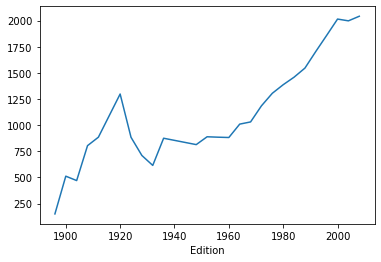

In [17]:
df.groupby('Edition')['Medal'].count().plot()

### 7. Make a list of countries showing number of all their medals. For each country show the first and the last year when medals were won.

In [18]:
df.groupby('NOC').agg({
    'Medal': 'count',
    'Edition': ['min', 'max']
})

Medal Edition      
    count     min   max
NOC                    
AFG     1    2008  2008
AHO     1    1988  1988
ALG    14    1984  2008
ANZ    29    1908  1912
ARG   239    1924  2008
..    ...     ...   ...
VIE     2    2000  2008
YUG   435    1924  2000
ZAM     2    1984  1996
ZIM    23    1980  2008
ZZX    48    1896  1904

[138 rows x 3 columns]

### 8. Athletes won medals in 100 or 200m in Beijing

In [19]:
rows_filter = (df['City'] == 'Beijing') & (df['Event'].str.contains(r'[1,2]00m', flags=re.I))
df.loc[rows_filter, 'Athlete'].drop_duplicates()

27210       STOECKEL, Hayden
27211     VYATCHANIN, Arkady
27212         PEIRSOL, Aaron
27213          GREVERS, Matt
27214      HOELZER, Margaret
                ...         
27618    POLYAKOVA, Evgeniya
27619         BORLEE, Olivia
27620           GEVAERT, Kim
27621          MARIEN, Hanna
27622      OUEDRAOGO, Elodie
Name: Athlete, Length: 145, dtype: object

### 9. Plot gold medals number won by US Men and Women

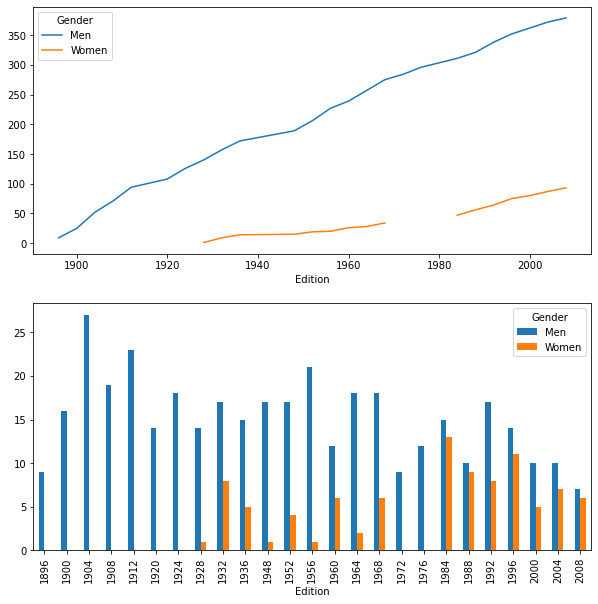

In [20]:
rows_filter = (df['NOC'] == 'USA') & (df['Sport'] == 'Athletics') & (df['Medal'] == 'Gold')
s1 = df[rows_filter].groupby(['Edition', 'Gender'])['Medal'].count().unstack()

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
s1.cumsum(axis='index').plot(ax=axes[0])
s1.plot.bar(ax=axes[1])

### 10. Plot a chart with top 5 athletes who have got most of gold medals

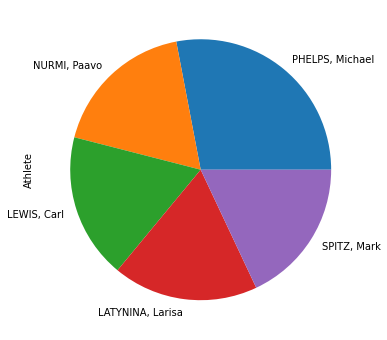

In [21]:
# Commented out the original one which looks inefficient but also could be a way do doing it
# df[df['Medal'] == 'Gold'].groupby('Athlete')['Medal'].count().nlargest(5).plot.pie(figsize=(6, 6))
df[df['Medal'] == 'Gold']['Athlete'].value_counts().head(5).plot.pie(figsize=(6, 6))

### 11. Show number of medals won by a)each country b) overall on the last Olympic Games

In [22]:
# a)
df[df['Edition'] == 2008]['NOC'].value_counts()

# b)
df.loc[df['Edition'] == 2008, 'Medal'].count()

USA    315
CHN    184
AUS    149
RUS    143
GER    101
      ... 
VIE      1
AFG      1
CHI      1
MAS      1
VEN      1
Name: NOC, Length: 86, dtype: int64

2042

### 12. Create a table with top 1 US athlete per each Games by overall number of medals

In [95]:
# Anna, this task took quite a bit of work and I'd really appreciate 
# if you were able to show the most efficient way of solving it.
# Thank you

# grouping by year and count medal per athlete.
df4 = df[df['NOC'] == 'USA'].groupby('Edition')['Athlete'].value_counts()

# need to rename Series itself to be able reset index later
# could do inplace without assigning but Jupyter outputs result of this line
# so do via assignment
df4 = df4.rename('Medal', inplace=True)

# TypeError: Cannot reset_index inplace on a Series to create a DataFrame
# so do via assignment
df4 = df4.reset_index()
df4.drop_duplicates('Edition', keep='first', inplace=True)

# show intermediate result, still need to drop 'Medal' col and merge in 'Discipline'
df4

,Edition,Athlete,Medal
0,1896,"GARRETT, Robert",4
12,1900,"BAXTER, Irving",5
49,1904,"DOWNING, Burton",6
319,1908,"SHEPPARD, Melvin",3
370,1912,"OSBURN, Carl Townsend",4
439,1920,"LEE, Willis",7
572,1924,"WEISSMULLER, Johnny",4
744,1928,"BARBUTI, Raymond James",2
817,1932,"DIDRIKSON, Mildred",3
978,1936,"OWENS, Jesse",4


In [96]:
# prepare 'Discipline' data for merge. 
# Assume there might be more than one Discipline for a given athlete for a given year
# but let's take the first one
df5 = df.loc[:, ['Athlete', 'Discipline']].drop_duplicates('Athlete', keep='first')

# drop 'Medal'
df4.drop(columns=['Medal'], inplace=True)

# final step -> merge
df6 = pd.merge(df4, df5, how='left', left_on='Athlete', right_on='Athlete')
df6

,Edition,Athlete,Discipline
0,1896,"GARRETT, Robert",Athletics
1,1900,"BAXTER, Irving",Athletics
2,1904,"DOWNING, Burton",Cycling Track
3,1908,"SHEPPARD, Melvin",Athletics
4,1912,"OSBURN, Carl Townsend",Shooting
5,1920,"LEE, Willis",Shooting
6,1924,"WEISSMULLER, Johnny",Swimming
7,1928,"BARBUTI, Raymond James",Athletics
8,1932,"DIDRIKSON, Mildred",Athletics
9,1936,"OWENS, Jesse",Athletics
